In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import scipy as sp


In [2]:
df = pd.read_csv('Citywide_Payroll_Data__Fiscal_Year_.csv')
df.head()

/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABA'AHMID,RAHASHEEM,E,07/14/2003,MANHATTAN,COMMUNITY ASSOCIATE,ACTIVE,47678.0,per Annum,1830.00,47166.03,2.25,57.28,0.0
1,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABENSUR,MARGARET,NaN,06/12/1995,MANHATTAN,ADMINISTRATIVE ACCOUNTANT,ACTIVE,119959.0,per Annum,1831.00,119042.50,0.00,0.00,0.0
2,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABOUNAOUM,ANDREA,L,10/11/2011,MANHATTAN,COMMUNITY ASSOCIATE,ON LEAVE,39966.0,per Annum,1181.68,27452.62,1.00,21.34,33.0
3,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABRAHAM,JONATHAN,J,12/01/2014,MANHATTAN,COMPUTER SYSTEMS MANAGER,ACTIVE,116000.0,per Annum,1831.00,115104.57,0.00,0.00,0.0
4,2016,NaN,DISTRICT ATTORNEY-MANHATTAN,ABRAMS,JOSEPH,NaN,05/21/2015,MANHATTAN,COLLEGE AIDE,CEASED,1.0,per Hour,0.00,3500.00,0.00,0.00,0.0


## Data Cleaning/ EDA

In [4]:
# Drop columns that won't be used
df.drop(columns = ['Payroll Number', 'Last Name', 'First Name', 'Mid Init', 'Regular Gross Paid', 'Total Other Pay', 'Title Description'], inplace = True)

In [5]:
df['Work Location Borough'].value_counts()

MANHATTAN        1973648
QUEENS            314273
BROOKLYN          270114
BRONX             149190
OTHER              71698
RICHMOND           38231
WESTCHESTER         2813
Manhattan           1622
ULSTER              1578
Bronx                935
SULLIVAN             685
Queens               660
DELAWARE             463
PUTNAM               201
NASSAU               196
SCHOHARIE            145
Richmond             112
DUTCHESS             109
ALBANY                74
GREENE                51
WASHINGTON DC         38
ORANGE                21
Name: Work Location Borough, dtype: int64

In [95]:
# clean up work location for 4 main boroughs
df.loc[df['Work Location Borough'] =='MANHATTAN', 'Work Location Borough']= 'Manhattan'
df.loc[df['Work Location Borough'] =='QUEENS', 'Work Location Borough']= 'Queens'
df.loc[df['Work Location Borough'] =='BROOKLYN', 'Work Location Borough']= 'Brooklyn'
df.loc[df['Work Location Borough'] =='BRONX', 'Work Location Borough']= 'Bronx'


In [96]:
# drop worklocations other than 4 main boroughs

na_dict= {'OTHER' : np.nan,
'RICHMOND' : np.nan,
'WESTCHESTER' : np.nan,
'ULSTER' : np.nan,
'SULLIVAN' : np.nan,
'DELAWARE' : np.nan,
'PUTNAM' : np.nan,
'NASSAU' : np.nan,
'SCHOHARIE' : np.nan,
'Richmond' : np.nan,
'DUTCHESS' : np.nan,
'ALBANY' : np.nan,
'GREENE' : np.nan,
'WASHINGTON DC' : np.nan,
'ORANGE' : np.nan }

df['Work Location Borough'].replace(na_dict, inplace = True)

df.dropna(inplace = True)

In [111]:
df.groupby('Work Location Borough')['Base Salary'].mean()

Work Location Borough
Bronx        64443.859286
Brooklyn     65521.208387
Manhattan    72902.577294
Queens       68192.155679
Name: Base Salary, dtype: float64

Text(0.5, 1.0, 'Average Base Salary vs. Work Location')

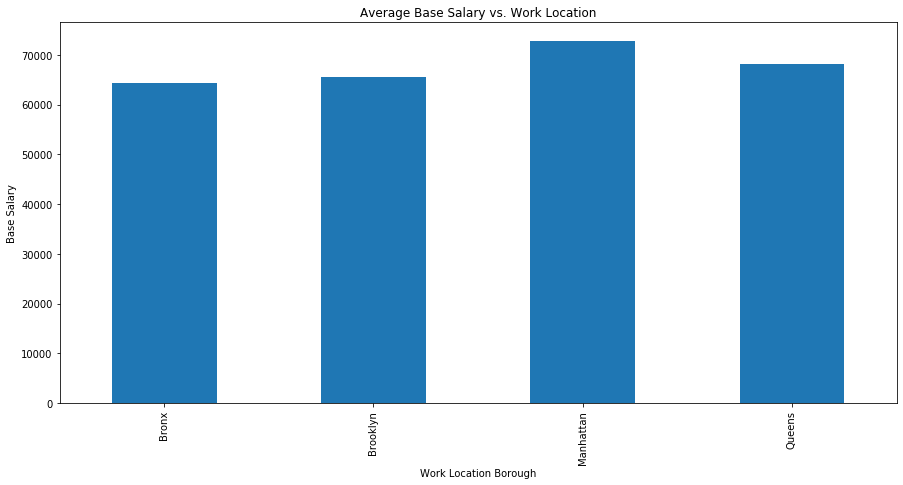

In [135]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Work Location Borough')['Base Salary'].mean().plot(kind = 'bar', ax=ax)
ax.set_ylabel('Base Salary')
ax.set_title('Average Base Salary vs. Work Location')


In [119]:
df.groupby('years_with_city')['Base Salary'].mean().nlargest(20)

years_with_city
57.0    110893.750000
54.0     95342.615385
53.0     91456.400000
52.0     87857.724138
55.0     87447.615385
24.0     85691.264780
22.0     85547.828340
23.0     85480.899678
21.0     84351.430370
36.0     83769.340934
56.0     83504.555556
25.0     83416.587429
39.0     83391.738878
37.0     83360.208249
34.0     83056.134294
35.0     82920.635988
40.0     82910.130058
33.0     82782.324351
38.0     82713.023077
20.0     81902.000881
Name: Base Salary, dtype: float64

Text(0.5, 1.0, 'Average Base Salary vs Years Worked for City')

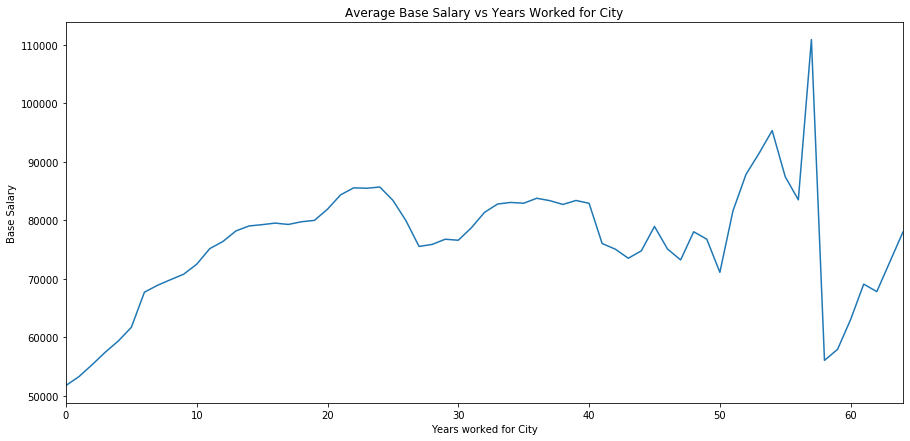

In [140]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('years_with_city')['Base Salary'].mean().plot(ax=ax)
ax.set_ylabel('Base Salary')
ax.set_xlabel('Years worked for City')
ax.set_title('Average Base Salary vs Years Worked for City')


In [125]:
df.groupby('Agency Name')['Base Salary'].mean().nlargest(20)

Agency Name
OFFICE OF COLLECTIVE BARGAININ    112844.061728
FINANCIAL INFO SVCS AGENCY        107143.024292
OFFICE OF THE ACTUARY             102629.173684
INDEPENDENT BUDGET OFFICE          99621.603550
TAX COMMISSION                     98758.714286
OFFICE OF THE MAYOR                96970.291128
CONFLICTS OF INTEREST BOARD        94616.474138
MUNICIPAL WATER FIN AUTHORITY      93822.246154
CITY COUNCIL                       91128.392076
DISTRICT ATTORNEY-SPECIAL NARC     89288.769912
NYC DEPT OF VETERANS' SERVICES     88868.442308
NYC FIRE PENSION FUND              88026.772727
OFFICE OF MANAGEMENT & BUDGET      86738.662891
CAMPAIGN FINANCE BOARD             85617.397380
DEPT OF INFO TECH & TELECOMM       85461.000848
OFFICE OF EMERGENCY MANAGEMENT     85319.524729
OFF OF PAYROLL ADMINISTRATION      84707.220472
DEPT OF ED PEDAGOGICAL             84501.307154
MAYORS OFFICE OF CONTRACT SVCS     84072.398568
OFFICE OF THE COMPTROLLER          83661.971561
Name: Base Salary, dtype: fl

Text(0.5, 1.0, 'Average Base Salary for Top 10 Highest Paying City Agencies')

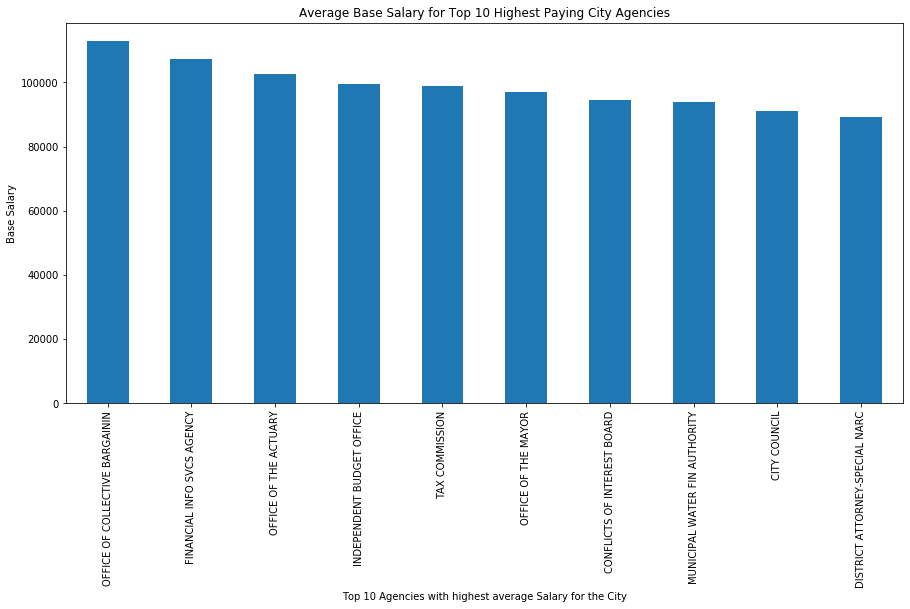

In [141]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby('Agency Name')['Base Salary'].mean().nlargest(10).plot(kind = 'bar', ax=ax)
ax.set_ylabel('Base Salary')
ax.set_xlabel('Top 10 Agencies with highest average Salary for the City')
ax.set_title('Average Base Salary for Top 10 Highest Paying City Agencies')

In [72]:
# bx= 1, bk = 2, manhatt= 3, qu = 4
df.loc[df['Work Location Borough'] =='Bronx', 'Work Location Borough']= 1
df.loc[df['Work Location Borough'] =='Brooklyn', 'Work Location Borough']= 2
df.loc[df['Work Location Borough'] =='Manhattan', 'Work Location Borough']= 3
df.loc[df['Work Location Borough'] =='Queens', 'Work Location Borough']= 4



In [98]:
# create start year column to be able to make years_working column
df['start_year'] = df['Agency Start Date'].apply(lambda x: int(x[6:]))
df['years_with_city'] = df[['Fiscal Year']].sub(df['start_year'], axis=0)

In [99]:
# Drop 2014 to look at past 5 years
df.loc[df['Fiscal Year']==2014, 'Fiscal Year'] = np.nan
df.dropna(inplace = True)

In [100]:
df['Pay Basis'].value_counts()

per Annum          1579355
per Day             607849
per Hour            507035
Prorated Annual      12986
Name: Pay Basis, dtype: int64

In [101]:
# work with per Annum and drop the rest
pay_dict = {'per Day': np.nan,
           'per Hour': np.nan,
            'Prorated Annual': np.nan}

df['Pay Basis'].replace(pay_dict, inplace = True)

df.dropna(inplace = True)

In [102]:
# drop Pay now that we only have per Annu
df.drop(columns = 'Pay Basis', inplace = True)

In [103]:
# drop people ceased, on leave, seasonal, or on sapartation leave, want only active working employees
zero_dict = {'CEASED': np.nan,
            'ON LEAVE': np.nan,
            'SEASONAL': np.nan,
            'ON SEPARATION LEAVE': np.nan}

df['Leave Status as of June 30'].replace(zero_dict, inplace = True)

df.dropna(inplace = True)

In [104]:
# drop column after getting current working employees
df.drop(columns = 'Leave Status as of June 30', inplace = True)

In [105]:
# error with start date saying they worked negitave years
df.loc[df['years_with_city']<0, 'years_with_city'] = np.nan
df.dropna(inplace = True)


In [106]:
# error saying worked more than 100 years
df.loc[df['years_with_city']>100, 'years_with_city'] = np.nan
df.dropna(inplace = True)

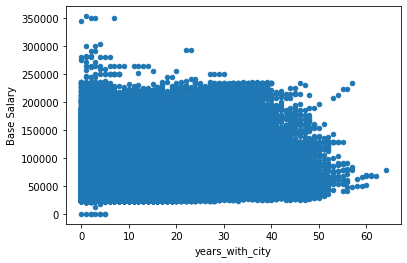

In [18]:
df.plot(kind ='scatter', x= 'years_with_city', y = 'Base Salary' )

In [107]:
# drop outliers that are making less than minimum wage
df.loc[df['Base Salary']<20000, 'Base Salary']= np.nan
df.dropna(inplace = True)

In [108]:
# drop one person that was working more 12 hours a day 
df.loc[df['Regular Hours']>3000, 'Regular Hours']= np.nan
df.dropna(inplace = True)

In [109]:
# drop columns once we have years worked
df.drop(columns = ['start_year', 'Agency Start Date'], inplace = True)

In [110]:
# community boards had less that 
df.loc[df['Agency Name'].str.contains("COMMUNITY BOARD"), 'Agency Name'] = np.nan
df.dropna(inplace = True)

In [86]:
# create dummy variable for borough worked in 
borough_dummies = pd.get_dummies(df['Work Location Borough'], prefix='borough', drop_first=True)
df.drop(['Work Location Borough'], axis=1, inplace = True)
df = pd.concat([df, borough_dummies], axis=1)

In [87]:
# creat dummy variables of name of agencies
agency_dummies = pd.get_dummies(df['Agency Name'], prefix='agency', drop_first=True)
df = df.drop(['Agency Name'], axis=1)
df = pd.concat([df, agency_dummies], axis=1)

In [88]:
# fix columns of dummy variables of agency so it can be read in ols
df.columns = [x.replace(' ', '_') for x in df.columns]
df.columns = [x.replace('#','') for x in df.columns]
df.columns = [x.replace("'", '') for x in df.columns]
df.columns = [x.replace('.','') for x in df.columns]
df.columns = [x.replace('(','') for x in df.columns]
df.columns = [x.replace(')','') for x in df.columns]
df.columns = [x.replace('&','_') for x in df.columns]
df.columns = [x.replace('-','_') for x in df.columns]
df.columns = [x.replace('/','_') for x in df.columns]

In [89]:
df.shape

(1377321, 94)

In [90]:
df.groupby('Fiscal_Year')['Base_Salary'].mean()

Fiscal_Year
2015.0    65996.093331
2016.0    67788.824456
2017.0    70518.170776
2018.0    72872.302252
2019.0    75058.959833
Name: Base_Salary, dtype: float64

## Feature Selection

In [27]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

In [28]:
# creat a clean features columnms
features = list(df.columns)
features.remove('Base_Salary')

new_feature = listToString(features)

new_features = new_feature.replace(' ', ' + ')

features2 = 'Base_Salary ~ ' + new_features
features2

'Base_Salary ~ Fiscal_Year + Regular_Hours + OT_Hours + Total_OT_Paid + years_with_city + borough_2 + borough_3 + borough_4 + agency_ADMIN_TRIALS_AND_HEARINGS + agency_BOARD_OF_CORRECTION + agency_BOARD_OF_ELECTION + agency_BOROUGH_PRESIDENT_BRONX + agency_BOROUGH_PRESIDENT_BROOKLYN + agency_BOROUGH_PRESIDENT_QUEENS + agency_BRONX_DISTRICT_ATTORNEY + agency_BUSINESS_INTEGRITY_COMMISSION + agency_CAMPAIGN_FINANCE_BOARD + agency_CITY_CLERK + agency_CITY_COUNCIL + agency_CIVIL_SERVICE_COMMISSION + agency_CIVILIAN_COMPLAINT_REVIEW_BD + agency_COMMUNITY_COLLEGE_BRONX + agency_COMMUNITY_COLLEGE_HOSTOS + agency_COMMUNITY_COLLEGE_KINGSBORO + agency_COMMUNITY_COLLEGE_LAGUARDIA + agency_COMMUNITY_COLLEGE_MANHATTAN + agency_COMMUNITY_COLLEGE_QUEENSBORO + agency_CONFLICTS_OF_INTEREST_BOARD + agency_CONSUMER_AFFAIRS + agency_CULTURAL_AFFAIRS + agency_CUNY_CENTRAL_OFFICE + agency_DEPARTMENT_FOR_THE_AGING + agency_DEPARTMENT_OF_BUILDINGS + agency_DEPARTMENT_OF_BUSINESS_SERV + agency_DEPARTMENT_OF_CIT

In [29]:
from statsmodels.formula.api import ols
mlr_model=ols(formula = features2, data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Base_Salary   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 1.482e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:50:05   Log-Likelihood:            -1.5572e+07
No. Observations:             1377321   AIC:                         3.114e+07
Df Residuals:                 1377227   BIC:                         3.115e+07
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              -4.13e+06   2.41e+04   -171.570      0.000   -4.18e+06   -4.08e+06
Fiscal_Year                            2071.4769     11.932    173.613      0.000    2048.091    2094.862
Regular_Hours                             4.5330      0.065     69.840      0.000       4.406       4.660
OT_Hours                               -110.9197      0.247   -448.426      0.000    -111.405    -110.435
Total_OT_Paid                             1.9952      0.004    484.405      0.000       1.987       2.003
years_with_city                         890.7584      2.079    428.465      0.000     886.684     894.833
borough_2                               981.3006     81.351     12.063      0.000     821.856    1140.745
borough_3                              4883.8834     76.819     63.577      0.000    4733.321    5034.446
borough_4                              1054.1522     83.848     12.572      0.000     889.814    1218.491
agency_ADMIN_TRIALS_AND_HEARINGS       6984.7804    554.754     12.591      0.000    5897.482    8072.079
agency_BOARD_OF_CORRECTION             1.101e+04   1871.605      5.883      0.000    7341.693    1.47e+04
agency_BOARD_OF_ELECTION              -2047.1325    433.734     -4.720      0.000   -2897.237   -1197.028
agency_BOROUGH_PRESIDENT_BRONX         8567.1828   1215.790      7.047      0.000    6184.276     1.1e+04
agency_BOROUGH_PRESIDENT_BROOKLYN      9125.2853   1137.262      8.024      0.000    6896.290    1.14e+04
agency_BOROUGH_PRESIDENT_QUEENS        3600.0833   1180.763      3.049      0.002    1285.829    5914.338
agency_BRONX_DISTRICT_ATTORNEY         4334.5030    313.917     13.808      0.000    3719.237    4949.769
agency_BUSINESS_INTEGRITY_COMMISSION   5244.7992   1016.305      5.161      0.000    3252.876    7236.722
agency_CAMPAIGN_FINANCE_BOARD          1.856e+04    926.925     20.024      0.000    1.67e+04    2.04e+04
agency_CITY_CLERK                     -8962.4607   1113.050     -8.052      0.000   -1.11e+04   -6780.921
agency_CITY_COUNCIL                    2.374e+04    492.738     48.180      0.000    2.28e+04    2.47e+04
agency_CIVIL_SERVICE_COMMISSION        8593.4088   3194.663      2.690      0.007    2331.979    1.49e+04
agency_CIVILIAN_COMPLAINT_REVIEW_BD    7964.0454    711.993     11.186      0.000    6568.564    9359.527
agency_COMMUNITY_COLLEGE_BRONX         6430.3518    328.826     19.555      0.000    5785.864    7074.840
agency_COMMUNITY_COLLEGE_HOSTOS        6398.7656    387.012     16.534      0.000    5640.236    7157.295
agency_COMMUNITY_COLLEGE_KINGSBORO     5151.6546    323.315     15.934      0.000    4517.968    5785.341
agency_COMMUNITY_COLLEGE_LAGUARDIA     8733.1685    294.804     29.624      0.000    8155.363    9310.974
agency_CO

In [30]:
# scale continuous variables 
subset =['Regular_Hours', 'OT_Hours', 'Total_OT_Paid', 'years_with_city']

scaler = StandardScaler()

subset_scaled = []
for var in subset:
    new_col = var +"_scaled"
    df[new_col] = scaler.fit_transform(df[[var]])
    subset_scaled.append(new_col)

subset_scaled

['Regular_Hours_scaled',
 'OT_Hours_scaled',
 'Total_OT_Paid_scaled',
 'years_with_city_scaled']

In [31]:
# create a scaled features columnms
featuresSC = list(df.columns)
featuresSC.remove('Base_Salary')
featuresSC.remove('Regular_Hours')
featuresSC.remove('OT_Hours')
featuresSC.remove('Total_OT_Paid')
featuresSC.remove('years_with_city')

new_featureSC = listToString(featuresSC)

new_featuresSC = new_featureSC.replace(' ', ' + ')

featuresScaled = 'Base_Salary ~ ' + new_featuresSC
featuresScaled

'Base_Salary ~ Fiscal_Year + borough_2 + borough_3 + borough_4 + agency_ADMIN_TRIALS_AND_HEARINGS + agency_BOARD_OF_CORRECTION + agency_BOARD_OF_ELECTION + agency_BOROUGH_PRESIDENT_BRONX + agency_BOROUGH_PRESIDENT_BROOKLYN + agency_BOROUGH_PRESIDENT_QUEENS + agency_BRONX_DISTRICT_ATTORNEY + agency_BUSINESS_INTEGRITY_COMMISSION + agency_CAMPAIGN_FINANCE_BOARD + agency_CITY_CLERK + agency_CITY_COUNCIL + agency_CIVIL_SERVICE_COMMISSION + agency_CIVILIAN_COMPLAINT_REVIEW_BD + agency_COMMUNITY_COLLEGE_BRONX + agency_COMMUNITY_COLLEGE_HOSTOS + agency_COMMUNITY_COLLEGE_KINGSBORO + agency_COMMUNITY_COLLEGE_LAGUARDIA + agency_COMMUNITY_COLLEGE_MANHATTAN + agency_COMMUNITY_COLLEGE_QUEENSBORO + agency_CONFLICTS_OF_INTEREST_BOARD + agency_CONSUMER_AFFAIRS + agency_CULTURAL_AFFAIRS + agency_CUNY_CENTRAL_OFFICE + agency_DEPARTMENT_FOR_THE_AGING + agency_DEPARTMENT_OF_BUILDINGS + agency_DEPARTMENT_OF_BUSINESS_SERV + agency_DEPARTMENT_OF_CITY_PLANNING + agency_DEPARTMENT_OF_CORRECTION + agency_DEPARTM

In [32]:
Slr_model=ols(formula = featuresScaled, data=df).fit()
Slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Base_Salary   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 1.482e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:50:36   Log-Likelihood:            -1.5572e+07
No. Observations:             1377321   AIC:                         3.114e+07
Df Residuals:                 1377227   BIC:                         3.115e+07
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -4.115e+06   2.41e+04   -170.951      0.000   -4.16e+06   -4.07e+06
Fiscal_Year                            2071.4769     11.932    173.613      0.000    2048.091    2094.862
borough_2                               981.3006     81.351     12.063      0.000     821.856    1140.745
borough_3                              4883.8834     76.819     63.577      0.000    4733.321    5034.446
borough_4                              1054.1522     83.848     12.572      0.000     889.814    1218.491
agency_ADMIN_TRIALS_AND_HEARINGS       6984.7804    554.754     12.591      0.000    5897.482    8072.079
agency_BOARD_OF_CORRECTION             1.101e+04   1871.605      5.883      0.000    7341.693    1.47e+04
agency_BOARD_OF_ELECTION              -2047.1325    433.734     -4.720      0.000   -2897.237   -1197.028
agency_BOROUGH_PRESIDENT_BRONX         8567.1828   1215.790      7.047      0.000    6184.276     1.1e+04
agency_BOROUGH_PRESIDENT_BROOKLYN      9125.2853   1137.262      8.024      0.000    6896.290    1.14e+04
agency_BOROUGH_PRESIDENT_QUEENS        3600.0833   1180.763      3.049      0.002    1285.829    5914.338
agency_BRONX_DISTRICT_ATTORNEY         4334.5030    313.917     13.808      0.000    3719.237    4949.769
agency_BUSINESS_INTEGRITY_COMMISSION   5244.7992   1016.305      5.161      0.000    3252.876    7236.722
agency_CAMPAIGN_FINANCE_BOARD          1.856e+04    926.925     20.024      0.000    1.67e+04    2.04e+04
agency_CITY_CLERK                     -8962.4607   1113.050     -8.052      0.000   -1.11e+04   -6780.921
agency_CITY_COUNCIL                    2.374e+04    492.738     48.180      0.000    2.28e+04    2.47e+04
agency_CIVIL_SERVICE_COMMISSION        8593.4088   3194.663      2.690      0.007    2331.979    1.49e+04
agency_CIVILIAN_COMPLAINT_REVIEW_BD    7964.0454    711.993     11.186      0.000    6568.564    9359.527
agency_COMMUNITY_COLLEGE_BRONX         6430.3518    328.826     19.555      0.000    5785.864    7074.840
agency_COMMUNITY_COLLEGE_HOSTOS        6398.7656    387.012     16.534      0.000    5640.236    7157.295
agency_COMMUNITY_COLLEGE_KINGSBORO     5151.6546    323.315     15.934      0.000    4517.968    5785.341
agency_COMMUNITY_COLLEGE_LAGUARDIA     8733.1685    294.804     29.624      0.000    8155.363    9310.974
agency_COMMUNITY_COLLEGE_MANHATTAN     3728.7831    273.544     13.631      0.000    3192.646    4264.921
agency_COMMUNITY_COLLEGE_QUEENSBORO    8568.9613    314.224     27.270      0.000    7953.092    9184.830
agency_CONFLICTS_OF_INTEREST_BOARD      2.69e+04   1830.987     14.693      0.000    2.33e+04    3.05e+04
agency_CONSUMER_AFFAIRS               -4429.5655    466.814     -9.489      0.000   -5344.505   -3514.625
agency_CU

## Check to transform data

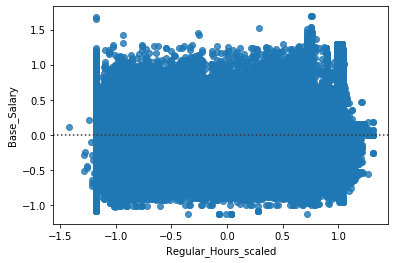

In [33]:
sns.residplot(df['Regular_Hours_scaled'],  np.log(df['Base_Salary']));


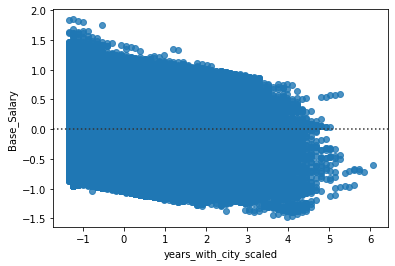

In [34]:
sns.residplot( df['years_with_city_scaled'], np.log(df['Base_Salary']));


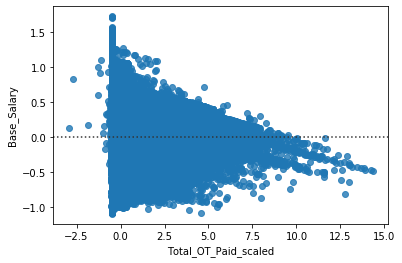

In [35]:
sns.residplot(df['Total_OT_Paid_scaled'],  np.log(df['Base_Salary']));


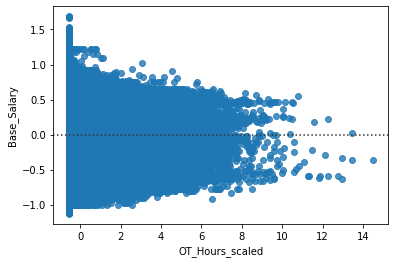

In [36]:
sns.residplot(df['OT_Hours_scaled'], np.log(df['Base_Salary']));


In [37]:
# log base_salary after looking at scaled continuous variables
df['Base_Salary'] = np.log(df['Base_Salary'])

In [38]:
# look at scaled/logged df
Log_Slr_model=ols(formula = featuresScaled, data=df).fit()
Log_Slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Base_Salary   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                 2.218e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:52:10   Log-Likelihood:                -72142.
No. Observations:             1377321   AIC:                         1.445e+05
Df Residuals:                 1377227   BIC:                         1.456e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               -46.8132      0.312   -150.111      0.000     -47.424     -46.202
Fiscal_Year                               0.0287      0.000    185.439      0.000       0.028       0.029
borough_2                                 0.0133      0.001     12.658      0.000       0.011       0.015
borough_3                                 0.0618      0.001     62.132      0.000       0.060       0.064
borough_4                                 0.0119      0.001     10.993      0.000       0.010       0.014
agency_ADMIN_TRIALS_AND_HEARINGS          0.0301      0.007      4.190      0.000       0.016       0.044
agency_BOARD_OF_CORRECTION                0.1396      0.024      5.755      0.000       0.092       0.187
agency_BOARD_OF_ELECTION                 -0.1150      0.006    -20.457      0.000      -0.126      -0.104
agency_BOROUGH_PRESIDENT_BRONX            0.0966      0.016      6.133      0.000       0.066       0.127
agency_BOROUGH_PRESIDENT_BROOKLYN         0.0889      0.015      6.032      0.000       0.060       0.118
agency_BOROUGH_PRESIDENT_QUEENS           0.0409      0.015      2.674      0.007       0.011       0.071
agency_BRONX_DISTRICT_ATTORNEY           -0.0078      0.004     -1.919      0.055      -0.016       0.000
agency_BUSINESS_INTEGRITY_COMMISSION      0.0391      0.013      2.971      0.003       0.013       0.065
agency_CAMPAIGN_FINANCE_BOARD             0.2146      0.012     17.868      0.000       0.191       0.238
agency_CITY_CLERK                        -0.2197      0.014    -15.234      0.000      -0.248      -0.191
agency_CITY_COUNCIL                       0.2569      0.006     40.233      0.000       0.244       0.269
agency_CIVIL_SERVICE_COMMISSION           0.0864      0.041      2.087      0.037       0.005       0.168
agency_CIVILIAN_COMPLAINT_REVIEW_BD       0.0843      0.009      9.135      0.000       0.066       0.102
agency_COMMUNITY_COLLEGE_BRONX            0.0536      0.004     12.575      0.000       0.045       0.062
agency_COMMUNITY_COLLEGE_HOSTOS           0.0571      0.005     11.393      0.000       0.047       0.067
agency_COMMUNITY_COLLEGE_KINGSBORO        0.0503      0.004     12.014      0.000       0.042       0.059
agency_COMMUNITY_COLLEGE_LAGUARDIA        0.1054      0.004     27.587      0.000       0.098       0.113
agency_COMMUNITY_COLLEGE_MANHATTAN        0.0358      0.004     10.105      0.000       0.029       0.043
agency_COMMUNITY_COLLEGE_QUEENSBORO       0.1040      0.004     25.549      0.000       0.096       0.112
agency_CONFLICTS_OF_INTEREST_BOARD        0.2826      0.024     11.914      0.000       0.236       0.329
agency_CONSUMER_AFFAIRS                  -0.0888      0.006    -14.682      0.000      -0.101      -0.077
agency_CU

## Model Evaluation

In [58]:
# test train split
y = df['Base_Salary']
x = df.drop(['Base_Salary', 'Regular_Hours', 'OT_Hours', 'Total_OT_Paid', 'years_with_city'], axis=1)

x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [40]:
# ridge, lasso , lin reg
ridge_01 = Ridge(alpha=0.1)
ridge_01.fit(x_train, y_train)

lasso_01 = Lasso(alpha=0.1)
lasso_01.fit(x_train, y_train)

lin = LinearRegression()
lin.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print("Unpenalized Linear Regression Coefficients are:{}".format(lin.coef_))
print(abs(lin.coef_.sum()))
print("Unpenalized Linear Regression Intercept:{}".format(lin.intercept_))

Unpenalized Linear Regression Coefficients are:[ 0.02874412  0.01359026  0.06182182  0.01182297  0.02499891  0.14319331
 -0.11694133  0.10987652  0.09470751  0.05128982 -0.00804001  0.04509575
  0.22231914 -0.21271703  0.26241769  0.08846445  0.08495105  0.05642926
  0.05492838  0.05205763  0.1017169   0.03879234  0.10568944  0.30493357
 -0.09395279  0.14733573  0.11603995  0.00361892  0.09335483  0.12536261
  0.14082453  0.0117247  -0.03552579 -0.00891833  0.12978694 -0.17211099
  0.00056512 -0.02181812 -0.04180334 -0.54460726  0.33406611  0.05882073
  0.03519287  0.21870405 -0.10088168 -0.14040162  0.15526236  0.18933694
 -0.15194006  0.02509935  0.08124056  0.07229072  0.22602116  0.19121346
  0.42306764 -0.05059571  0.26844091 -0.07161619 -0.23224357  0.09655544
  0.01643133  0.3699395   0.03624904  0.10435441  0.2521937   0.31590657
  0.31670646 -0.00503303  0.28913023 -0.21288783  0.03174523  0.16749711
  0.46480709  0.32449115  0.00272314  0.22360374  0.27043877  0.11366315
  0.

In [42]:
print("Lasso Regression Coefficients are:{}".format(lasso_01.coef_))
print(abs(lasso_01.coef_.sum()))
print("Lasso Linear Regression Intercept:{}".format(lasso_01.intercept_))

Lasso Regression Coefficients are:[ 0.         -0.          0.         -0.         -0.          0.
 -0.          0.          0.          0.         -0.          0.
  0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.          0.          0.
 -0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.          0.         -0.
  0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.         -0.          0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.         -0.         -0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.          0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.         -0.          0.    

In [43]:
print("Ridge Regression Coefficients are:{}".format(ridge_01.coef_))
print(abs(ridge_01.coef_.sum()))
print("Ridge Linear Regression Intercept:{}".format(ridge_01.intercept_))

Ridge Regression Coefficients are:[ 2.87441475e-02  1.35909406e-02  6.18242586e-02  1.18238230e-02
  2.49693283e-02  1.43013681e-01 -1.16959461e-01  1.09801458e-01
  9.46417878e-02  5.12426028e-02 -8.06466982e-03  4.50538498e-02
  2.22229617e-01 -2.12660905e-01  2.62370933e-01  8.81330193e-02
  8.49099130e-02  5.64028378e-02  5.49014171e-02  5.20308253e-02
  1.01689082e-01  3.87645697e-02  1.05661277e-01  3.04543528e-01
 -9.39740747e-02  1.47229206e-01  1.15914978e-01  3.59134608e-03
  9.33265358e-02  1.25322509e-01  1.40784265e-01  1.17000713e-02
 -3.55524144e-02 -8.94448504e-03  1.29749699e-01 -1.72132287e-01
  5.40065114e-04 -2.18438328e-02 -4.18288491e-02 -5.44633406e-01
  3.34039294e-01  5.87948845e-02  3.51665626e-02  2.18673814e-01
 -1.00907003e-01 -1.40356798e-01  1.55226748e-01  1.89307652e-01
 -1.51964343e-01  2.50732537e-02  8.12119142e-02  7.22621400e-02
  2.25966153e-01  1.90625197e-01  4.23015488e-01 -5.06202907e-02
  2.68369432e-01 -7.16421975e-02 -2.32268954e-01  9.6503

In [44]:
# create predictions
y_h_ridge_train = ridge_01.predict(x_train)
y_h_ridge_test = ridge_01.predict(x_test)

y_h_lasso_train = lasso_01.predict(x_train)
y_h_lasso_test = lasso_01.predict(x_test)

y_h_lin_train = lin.predict(x_train)
y_h_lin_test = lin.predict(x_test)

In [45]:
# examine the residual sum of sq
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(x_train))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(x_test))**2))

Train Error Ridge Model 71567.79091905762
Test Error Ridge Model 17982.922994451015


Train Error Lasso Model 171583.55578563028
Test Error Lasso Model 42927.49091618406


Train Error Unpenalized Linear Model 71567.79073072216
Test Error Unpenalized Linear Model 17982.923867689704


In [46]:
# based on residual sum of sq test we will be using the ridge model
# now testing best alpha
# search for an optimal value of alpha in ridge
alphas = [0.001, .01]
a_scores = []
for a in alphas:
    ridge = Ridge(alpha=a)
    scores = cross_val_score(ridge, x, y, cv=10, scoring='neg_mean_squared_error')
    a_scores.append(-scores.mean())
print(a_scores)

[0.0658898523210959, 0.06588985159487323]


In [47]:
max(a_scores)

0.0658898523210959

In [59]:
ridge_001 = Ridge(alpha=0.01)
ridge_001.fit(x_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [60]:
y_h_ridge_train = ridge_001.predict(x_train)
y_h_ridge_test = ridge_001.predict(x_test)

In [61]:
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))

Train Error Ridge Model 71567.7907326108
Test Error Ridge Model 17982.92377562132


## See how our predictions from train test split turned out

In [51]:
# see how many std off we are
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_h_ridge_test))
test_rmse/y_test.std()

0.6338211332806463

Text(0.5, 1.0, 'How well our Model worked:\nTrue Values Vs. Predictions')

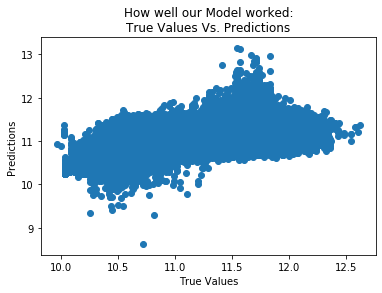

In [144]:
## The line / model
plt.scatter(y_test, y_h_ridge_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("""How well our Model worked:
True Values Vs. Predictions""")


In [64]:
sns.lmplot(y_test, y_h_ridge_test, lowess=True)

TypeError: lmplot() missing 1 required positional argument: 'data'

((array([-4.56342604, -4.37370233, -4.27081339, ...,  4.27081339,
          4.37370233,  4.56342604]),
  array([-1.60515722, -1.56686084, -1.35917222, ...,  1.54404898,
          1.54762508,  2.10212069])),
 (0.25217755253708807, 2.4037503775519588e-05, 0.9869655905153999))

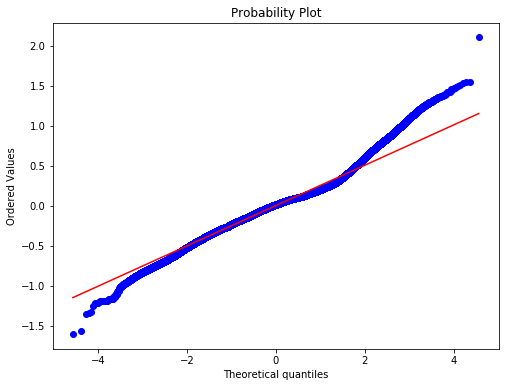

In [53]:
# qqplot
pred_val = y_h_ridge_test
true_val = y_test
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(8,6))
sp.stats.probplot(residual, plot=ax, fit=True)